In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import spot2intensity.correlation_significance as ss
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot

****************************************
RUNNING IN DEVELOP
****************************************


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
cs = ["slide_21","slide_22","slide_26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
#spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [13]:
np.random.RandomState(12345)

In [14]:
reload(a2)
reload(ss)

<module 'spot2intensity.correlation_significance' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/spot2intensity/correlation_significance.py'>

In [15]:
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

In [16]:
lb = data.ligand_batch_significance().groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)
lb

Ligand Batch
P115             4.459597e-01
P080             2.764615e-01
P133             3.246949e-02
P061             1.524019e-03
P009             2.713894e-07
P114             1.348583e-10
P066             2.696234e-11
P135             1.010225e-12
P130             8.741371e-13
P106             4.580016e-17
P050             2.096274e-31
P102             6.255869e-36
P100             1.566914e-36
P084             1.011288e-37
P048             6.879665e-66
P068             2.117903e-75
P060             2.125849e-78
P136             4.409731e-92
P098            1.943391e-106
P083            5.195637e-116
P131.1          2.550256e-117
P073            1.595366e-117
P052            2.355796e-128
AK_Cal_28667    1.535124e-143
P057            9.462717e-145
P089            1.584843e-157
P047            1.243526e-161
P090            6.397699e-169
P131.2          3.501268e-178
P082            2.499856e-179
                    ...      
P031             0.000000e+00
P030             0.000000e+

In [17]:
pbs = [list(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
pbs_len =  [len(lb.index.values[:i]) for i in range(1,len(lb.index.values))]
#lb

In [18]:
pbs[0]
spots_this = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = pbs[0])
data = a2.Data(spots_dj=spots_this)
data.x.groupby("Collection").count()

Ligand Batch,P115
Collection,
slide_21,9
slide_22,9
slide_23,9
slide_26,9
slide_27,9
slide_28,9
slide_31,9
slide_32,9
slide_33,9


In [20]:
pbs

[['P115'],
 ['P115', 'P080'],
 ['P115', 'P080', 'P133'],
 ['P115', 'P080', 'P133', 'P061'],
 ['P115', 'P080', 'P133', 'P061', 'P009'],
 ['P115', 'P080', 'P133', 'P061', 'P009', 'P114'],
 ['P115', 'P080', 'P133', 'P061', 'P009', 'P114', 'P066'],
 ['P115', 'P080', 'P133', 'P061', 'P009', 'P114', 'P066', 'P135'],
 ['P115', 'P080', 'P133', 'P061', 'P009', 'P114', 'P066', 'P135', 'P130'],
 ['P115',
  'P080',
  'P133',
  'P061',
  'P009',
  'P114',
  'P066',
  'P135',
  'P130',
  'P106'],
 ['P115',
  'P080',
  'P133',
  'P061',
  'P009',
  'P114',
  'P066',
  'P135',
  'P130',
  'P106',
  'P050'],
 ['P115',
  'P080',
  'P133',
  'P061',
  'P009',
  'P114',
  'P066',
  'P135',
  'P130',
  'P106',
  'P050',
  'P102'],
 ['P115',
  'P080',
  'P133',
  'P061',
  'P009',
  'P114',
  'P066',
  'P135',
  'P130',
  'P106',
  'P050',
  'P102',
  'P100'],
 ['P115',
  'P080',
  'P133',
  'P061',
  'P009',
  'P114',
  'P066',
  'P135',
  'P130',
  'P106',
  'P050',
  'P102',
  'P100',
  'P084'],
 ['P115'

In [23]:
frames = []
frames = []
data = a2.Data(spots_dj=spots_dj)
data = data.outlier_filtering().sample_on_collection(20).clean()
test_train = data.combination_split_train_test()


for pb in pbs[:40]:
    ana = a2.Analysis(data.subset_ligand_batches(pb),train_test=test_train)
    ana.calculate_all()
    frames.append(ana.complete_information())


/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py:142: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Test", row)
/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py:143: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  comb.set_value(i, "Train", tuple(set(cs) - set(row)))


*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models****

In [24]:
result = pd.concat(frames , keys =pbs_len)
result.index.names = ["Peptide Batches", 'Analyte Batch',"Collection", "Sample"]
result_mean = result.reset_index().groupby(["Peptide Batches","Analyte Batch","Test"]).mean()
result_mean =result_mean.reset_index()
result_mean["Peptide Batches"] = result_mean["Peptide Batches"].astype("float")
result_mean["Name"] = "Mean" 


In [25]:
result["TrueFalse"].value_counts()

1    107388
0     65412
Name: TrueFalse, dtype: int64

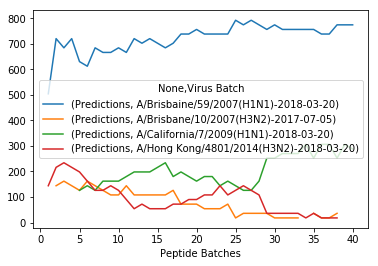

In [26]:
one_virus_data = result[result["y"] == "A/Brisbaine/59/2007(H1N1)-2018-03-20"]
values = pd.DataFrame(one_virus_data.groupby("Peptide Batches")["Predictions"].value_counts())
values.index.names = ['Peptide Batches', 'Virus Batch']
data = pd.pivot_table(values, values=["Predictions"],index=["Peptide Batches"],columns=["Virus Batch"])
data.plot()
plt.show()

In [27]:
one_virus_data.groupby(["Peptide Batches","Collection"]).apply(lambda x:  np.amax(x["Predictions"]))
one_virus_data

one_virus_data[one_virus_data.index.get_level_values("Peptide Batches") == 20]["Predictions"].value_counts().idxmax()

'A/Brisbaine/59/2007(H1N1)-2018-03-20'

In [28]:
result_m = result.groupby(["Peptide Batches","Analyte Batch","Collection"]).apply(lambda x:  x["Predictions"].value_counts().idxmax())
#display(result_m)
result_m = pd.DataFrame(result_m)
result_m = result_m.reset_index().rename(columns={0:"Majority"})
result_m["ms"] = (result_m["Majority"] == result_m["Analyte Batch"]).astype(float)



In [29]:
mpl.rcParams['font.family'] = 'San Francisco'
mpl.rcParams['font.family'] = 'bla'

font = {'family' : 'Roboto',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)

In [30]:
import seaborn as sns


In [31]:
def add_range(df):
    df["unit"]=range(len(df))
    return df

result_mean = result_mean.groupby("Peptide Batches").apply(add_range)

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


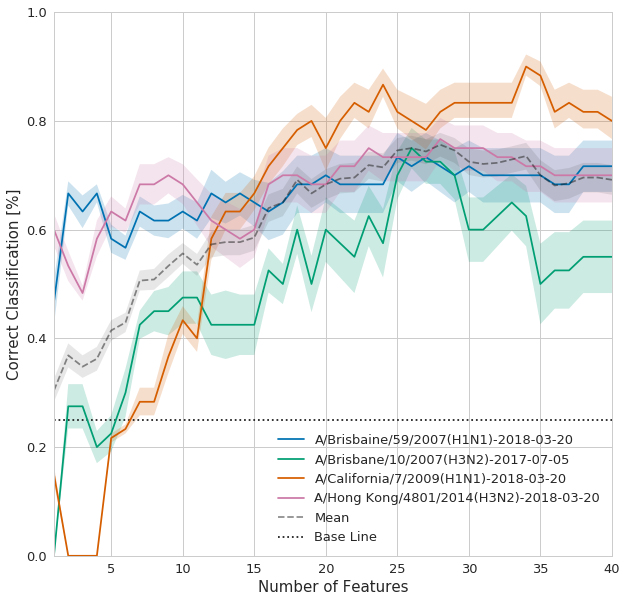

In [32]:
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="Test", condition="Analyte Batch",data=result_mean)
ax = sns.tsplot(time="Peptide Batches", value="TrueFalse", unit="unit", condition="Name", data=result_mean, color="k", linestyle="--", alpha=0.5, err_kws = {'alpha':0.1},legend=True,)
ax.hlines(y = 0.25,xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 
ax.set_ylim(0,1.0 )
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


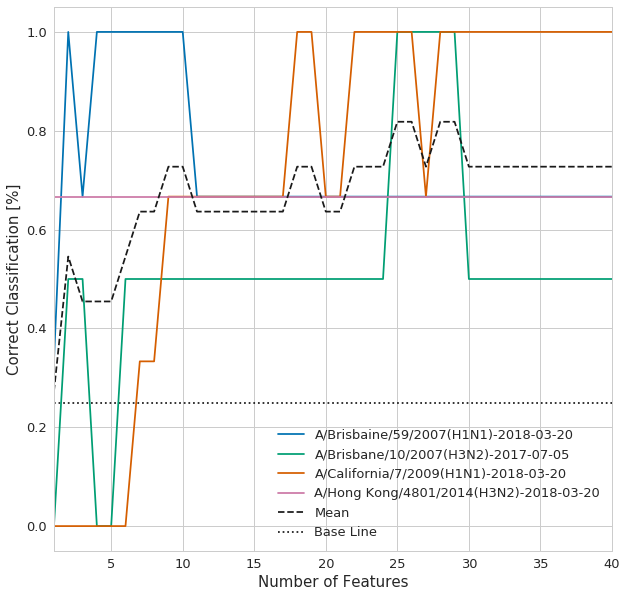

In [33]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.tsplot(time="Peptide Batches", value="ms", unit="Collection", condition="Analyte Batch",data=result_m, ci=False)
mean_data = result_m.groupby(["Peptide Batches"]).mean().reset_index()
x = mean_data["Peptide Batches"] 
y = mean_data["ms"] 
ax.hlines(y = 0.25,xmin=0,xmax=len(pbs),linestyle=":",label="Base Line") 

ax.plot(x,y,c="k",linestyle="--", label = "Mean")
plt.legend()
ax.legend(fontsize=13)


plt.xlabel("Number of Features",fontsize=15)
plt.ylabel("Correct Classification [%]",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

#ax.set_ylim(0,1.1)
plt.show()

In [34]:
result_m.groupby(["Peptide Batches"]).mean().reset_index()

,Peptide Batches,ms
0,1,0.272727
1,2,0.545455
2,3,0.454545
3,4,0.454545
4,5,0.454545
5,6,0.545455
6,7,0.636364
7,8,0.636364
8,9,0.727273
9,10,0.727273


In [35]:
from matplotlib.lines import Line2D

def lda_plot(data, ax,contour=False, **kwargs):
    colors = ["r","g","b","k"]
    cmaps = ["Reds","Greens","Blues","Greys"]
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        x = d["Principle 1"]
        y = d["Principle 2"]

        if contour:
            sns.kdeplot(x, y, cmap=cmap, label=n,ax=ax ,  shade=True, shade_lowest=False,**kwargs )
            continue

        
        d.plot.scatter(x="Principle 1",y="Principle 2",ax=ax, label=n,c=c ,**kwargs)

        
def add_legend(data,ax):
    a=[]
    for n,d in data.groupby("Analyte Batch"):
        a.append(n)
    cmaps = ["Reds","Greens","Blues","Greys"]
    cmmaps = [plt.get_cmap(name) for name in cmaps]
    custom_lines = [Line2D([0], [0], color=c(0.8), lw=8) for c in cmmaps]
    ax.legend(custom_lines,a)

In [36]:
reload(a2)
data = a2.Data(spots_dj=spots_dj).outlier_filtering().sample_on_collection(200).clean()

AttributeError: 'Data' object has no attribute 'groupby'

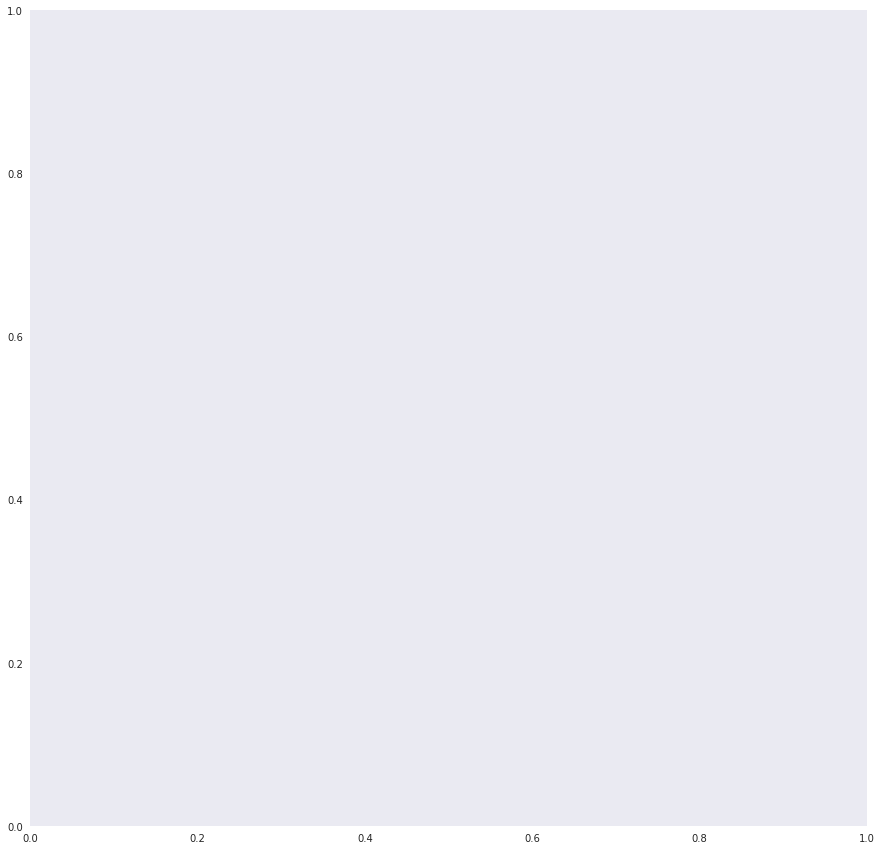

In [38]:
sns.set(style="dark", palette="muted", color_codes=True)
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_pca = make_pipeline(StandardScaler(), PCA(n_components=3))

std_pca.fit(data.x)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [40]:
dneu = std_pca.transform(data.x)
data1 = pd.DataFrame(dneu[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])

In [41]:
data

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)


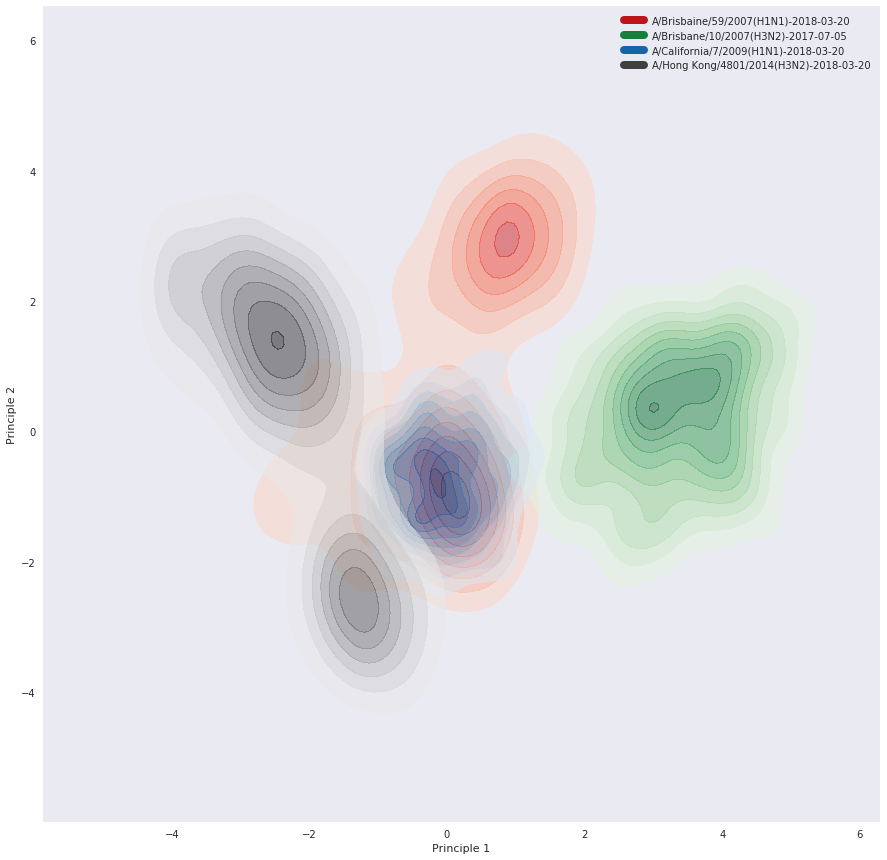

In [42]:
#data1 = pd.DataFrame(data.x_pca_fit().transform(data.x)[:,1:],index=data.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()

In [47]:
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
#spots_dj = spots_dj.filter(raw_spot__lig_fix_batch__sid__in = lb)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)
data_benchmark = a2.Data(spots_dj=spots_dj)

In [48]:
data_benchmark = a2.Data(spots_pd=data.spots_pd[(data.spots_pd["Replica"] < 10)])
#data= a2.Data(spots_dj=spots_dj)
data_benchmark.x

Ligand Batch                                               AK_Cal_28666  \
Analyte Batch                          Collection Replica                 
A/Brisbaine/59/2007(H1N1)-2018-03-20   slide_26   0        11621.345728   
                                                  1          216.864715   
                                                  2         5694.962025   
                                                  3        21737.096447   
                                                  4         2885.071994   
                                                  5         2991.299842   
                                                  6         2991.299842   
                                                  7        17576.796677   
                                                  8        21737.096447   
                                                  9          216.864715   
                                       slide_27   0          551.233386   
                                                  1          551.233386   
                                                  2          366.085443   
                                                  3          206.300633   
                                                  4          206.300633   
                                                  5         1837.132743   
                                                  6          638.973451   
                                                  7          674.505538   
                                                  8          674.505538   
                                                  9          638.973451   
                                       slide_28   0         2031.148734   
                                                  1          953.677083   
                                                  2         1304.297468   
                                                  3         1070.699115   
                                                  4         2031.148734   
                                                  5         1377.169304   
                                                  6         1304.297468   
                                                  7          279.682353   
                                                  8          360.150442   
                                                  9         1304.297468   
...                                                                 ...   
A/Hong Kong/4801/2014(H3N2)-2018-03-20 slide_21   0          812.761062   
                                                  1          715.613924   
                                                  2          979.522124   
                                                  3          812.761062   
                                                  4           86.070796   
                                                  5           86.070796   
                                                  6          776.451327   
                                                  7         1077.034014   
                                                  8          812.761062   
                                                  9          715.613924   
                                       slide_22   0          432.715190   
                                                  1          552.489715   
                                                  2          432.715190   
                                                  3          552.489715   
                                                  4          432.715190   
                                                  5          267.596519   
                                                  6         1893.400631   
                                                  7         1031.768987   
                                                  8         1893.400631   
                                                  9          267.596519   
                         

In [49]:
data_benchmark = data_benchmark.outlier_filtering().sample_on_collection(200).clean()

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)


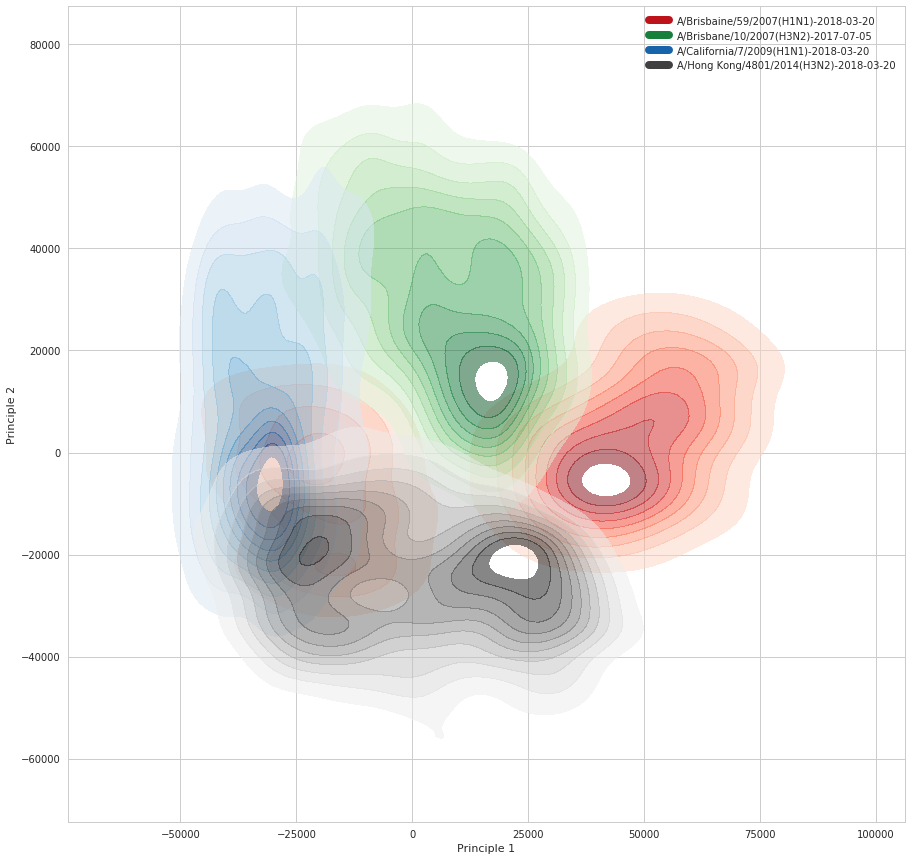

In [50]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
data1 = pd.DataFrame(data_benchmark.x_pca_fit().transform(data_benchmark.x)[:,:2],index=data_benchmark.x.index , columns =["Principle 1", "Principle 2"])
fig, ax = plt.subplots(figsize=(15,15))
lda_plot(data1,ax,contour=True,alpha=0.5)
add_legend(data1, ax)
plt.show()